In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [28]:
df=pd.read_csv('product h.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [29]:
sales_h= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Month No.','Marketing Expense'],axis=1)

In [30]:
sales_h.shape

(60, 1)

In [31]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [32]:
sales_h['Sales'].sum()

4057933

Text(0.5, 1.0, 'Product H')

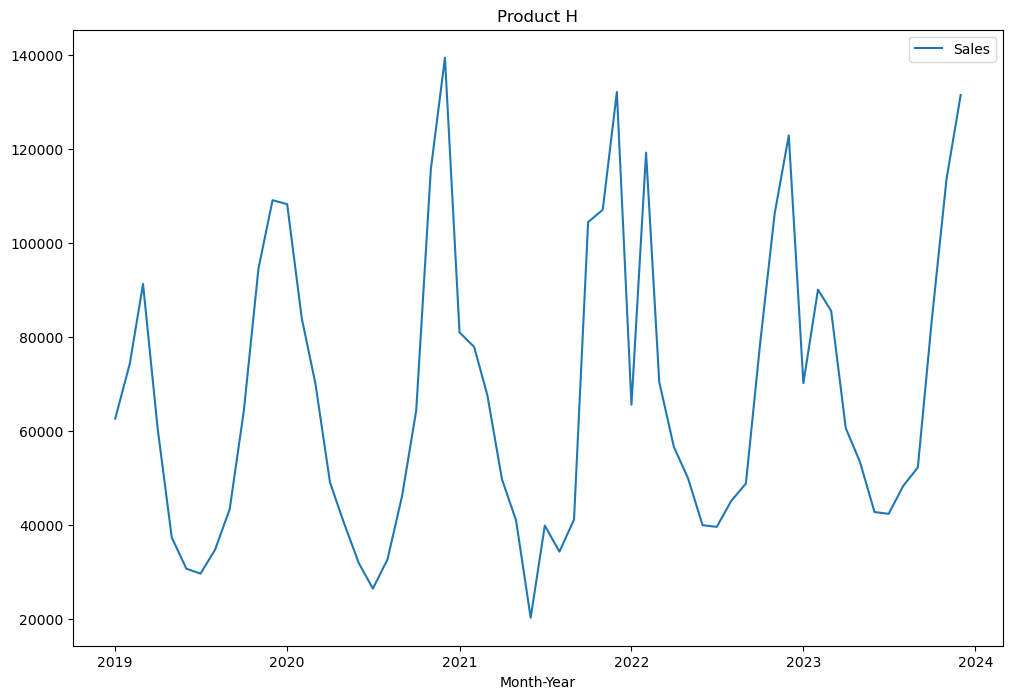

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_h)
plt.title('Product H')

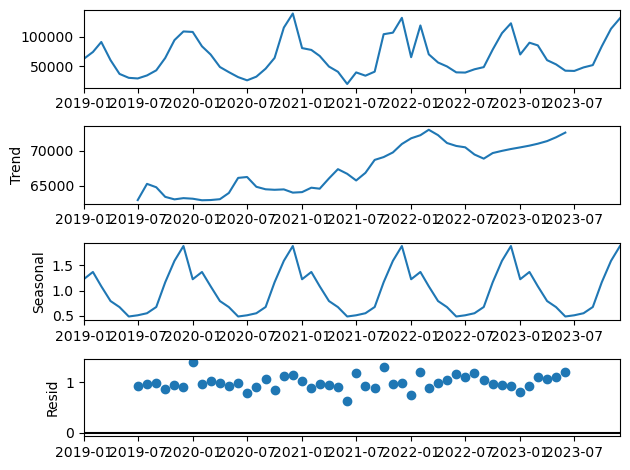

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_h, model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [35]:
train= sales_h[:48]
test=sales_h[48:]

In [36]:
len(train)

48

In [37]:
model=ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
pred=model.forecast(12)

In [39]:
pred

2023-01-01     90246.451712
2023-02-01     98991.490870
2023-03-01     74740.985704
2023-04-01     57138.304551
2023-05-01     48988.194481
2023-06-01     35875.322823
2023-07-01     40265.151506
2023-08-01     41801.888541
2023-09-01     51382.110198
2023-10-01     86149.178893
2023-11-01    114354.919553
2023-12-01    135483.034188
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product H')

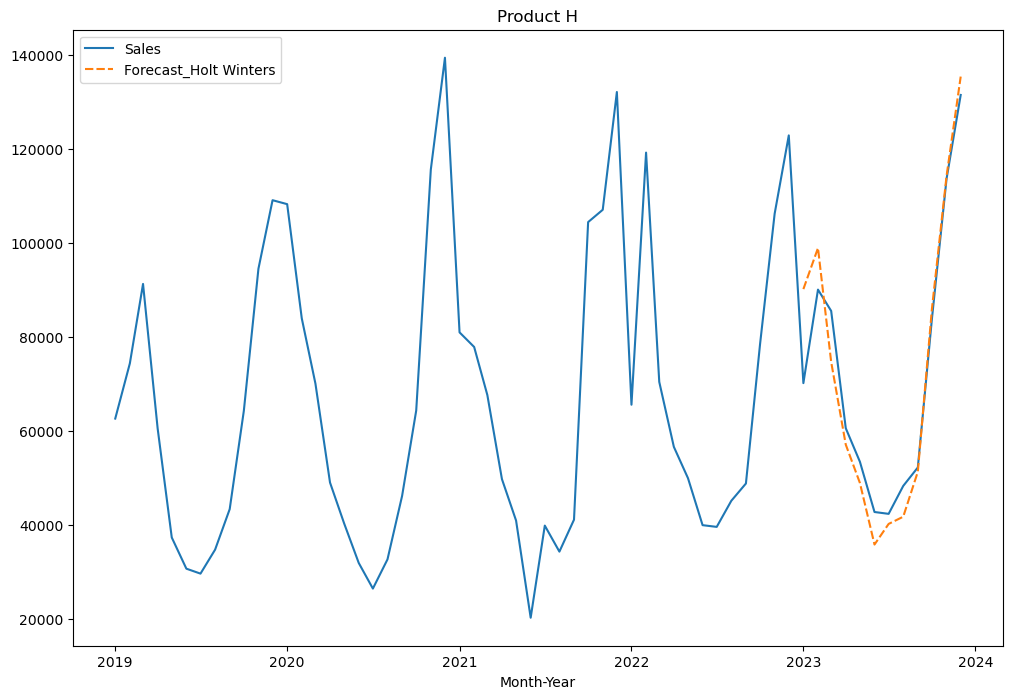

In [40]:
sales_h['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_h)
plt.title('Product H')

In [41]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 5909.2597843423655
MAPE - Holt Winters: 0.08980020665945132
MSE - Holt Winters: 62159220.55263591
RMSE - Holt Winters: 7884.111906399852
